# Model Training

## Guide

In [ ]:
guide_used = "https://www.kaggle.com/code/prasadmeesala/spam-email-classification-naivebayes"

## Make necessary imports

In [42]:
import opendatasets as od
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, naive_bayes, ensemble, tree, svm, model_selection, preprocessing, feature_extraction, metrics, base, pipeline
from joblib import dump, load

## Importing data

### Import data

In [6]:
od.download("https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset")

Skipping, found downloaded files in ".\email-spam-classification-dataset" (use force=True to force download)


### Read data

In [7]:
file = 'email-spam-classification-dataset/combined_data.csv'
df = pd.read_csv(file)

## Visualizing data

### Dataset statistics

In [8]:
labels = {0: 'Ham', 1: 'Spam'}

label_counts = df["label"].value_counts()
number_of_ham = label_counts[0]
number_of_spam = label_counts[1]
average_length_of_ham = df[df['label'] == 0]['text'].str.len().mean()
average_length_of_spam = df[df['label'] == 1]['text'].str.len().mean()

print(f'Number of ham (0) messages: {number_of_ham}')
print(f'Number of spam (1) messages: {number_of_spam}')
print()
print(f'Average character length of ham (0) messages: {round(average_length_of_ham)}')
print(f'Average character length of spam (1) messages: {round(average_length_of_spam)}')

Number of ham (0) messages: 39538
Number of spam (1) messages: 43910

Average character length of ham (0) messages: 2122
Average character length of spam (1) messages: 1250


### Visualize table

In [9]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


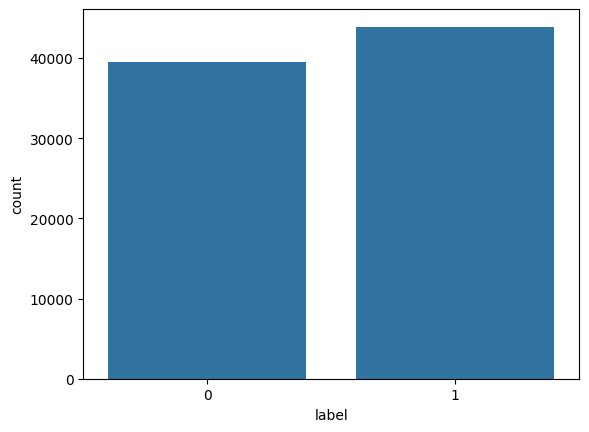

In [10]:
sns.countplot(x = 'label', data = df)
plt.show()

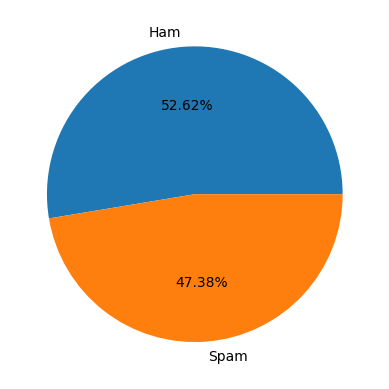

In [11]:
plt.pie(label_counts, labels = labels.values(), autopct = "%.2f%%")
plt.show()

In [12]:
df.groupby(df['label']).describe()

text                                                               
       count unique                                                top freq
label                                                                      
0      39538  39538   computer connection from cnn com wednesday es...    1
1      43910  43910  ounce feather bowl hummingbird opec moment ala...    1

### Vector Search

#### Vectorize the data

In [13]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

KeyboardInterrupt: 

In [ ]:
embedding_model = SentenceTransformer('BAAI/bge-large-en-v1.5')

(…)5db4aa81d7fb50dba76d5e2c6/.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

(…)1d7fb50dba76d5e2c6/1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

(…)548a15db4aa81d7fb50dba76d5e2c6/README.md:   0%|          | 0.00/90.3k [00:00<?, ?B/s]

(…)8a15db4aa81d7fb50dba76d5e2c6/config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

(…)d5e2c6/config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

(…)b50dba76d5e2c6/sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

(…)7fb50dba76d5e2c6/special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

(…)5db4aa81d7fb50dba76d5e2c6/tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

(…)1d7fb50dba76d5e2c6/tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

(…)548a15db4aa81d7fb50dba76d5e2c6/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)a15db4aa81d7fb50dba76d5e2c6/modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
normalize_embeddings = True
embeddings = []
texts = []

for text in tqdm.tqdm(df['text'].head(50)):
    embedding = embedding_model.encode(text, normalize_embeddings=normalize_embeddings)
    embeddings.append(embedding)
    texts.append(text)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [01:50<00:00,  2.21s/it]


In [ ]:
embeddings_np = np.vstack([np.array(embedding) for embedding in embeddings])

[[-0.02190477 -0.04049319  0.01485471 ... -0.00166547  0.02350216
  -0.03169324]
 [ 0.01869018 -0.01165807 -0.01002243 ... -0.00663692  0.00794195
   0.00469761]
 [ 0.03141703  0.02081136 -0.03279289 ... -0.01215169 -0.03370753
  -0.01543123]
 ...
 [ 0.02870342  0.00349483 -0.04095789 ... -0.01628988  0.01129367
   0.02630034]
 [ 0.02350716  0.02339983 -0.01370283 ...  0.00056653 -0.01468727
  -0.03170457]
 [ 0.03679869  0.01586485 -0.00270949 ... -0.01220061  0.00109678
  -0.00482159]]


#### Visualize the data

In [ ]:
topic_model = BERTopic().fit(texts, embeddings_np)
topic_model.visualize_documents(texts, embeddings=embeddings_np)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'hovertext': array(["while we may have high expectations of our associates we also give them high rewards imagine being part of a stable organization with a sterling reputation a place where the sydney car centre is an integral part of all that we do with our car centre personality you'll not just succeed you'll thrive and with our strong commitment to promoting from within you'll definitely enjoy your rise to the top today the sydney car centre is looking for an industrious regional assistant to fasten the process of the delivery of customer payments to the suppliers the position offered is a part time job and will only require from you to be available for escapenumber escapenumber hours a day as a regional assistant you will be supposed to operate with the payments from those customers based in your country you will be expected to accept escapenumber escapenumber transactions to your bank account every week make certain calculations about every transaction you will be precisely instructed about it transfer the funds to the suppliers by means of western union money gram less your fee the charges of the western union money gram you will be continuously communicating with the manager from the head office who will instruct you give advice regarding every new payment the ideal candidate will be industrious goal oriented person with the availability of a personal business bank account suitable to be used for the company needs knowledge of english computer literacy and sociability are appreciated the company guarantees to pay net escapenumber fee out of the amount of every payment you dealt with and to provide you with the regular income flexible schedule all the related expenses you might have like the western union money gram chargers related expenses on traveling are covered by the company the more detailed information is available on our web site http vacancy escapenumber sccentre hk vacancies php where you can fill in the on line application form for this position we would be glad to welcome you in our team we are looking forward to hearing from you as soon as possible yours sincerely allyson eddy qtn escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong stack escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapenumberjk escapelong escapelong escapelong escapelong escapelong escapelong escapelong zpcescapenumber escapelong escapelong buy escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong interface ber cvs escapenumber rescapenumberv escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong vcs cvs interface api wey update escapenumberkv dec escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong gescapenumberk escapelong escapelong escapelong escapelong escapelong ipsc escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong escapelong jhescapenumber escapelong escapelong escapelong common revision apiescapenumberce escapelong escapelong escapelong escapelong escapelong escapelong escapelong function escapelong escapelong escapelong escapelong dec exe lescapenumberzd zescapenumbert exe dmc

## Data preprocessing

### Data cleaning

In [14]:
# Check for null values
print(f'Number of null values: {df["text"].isna().sum()}')

# Handle duplicates
print(f'Number of duplicated urls : {np.sum(df.duplicated())}')
df.drop_duplicates(inplace = True)
print(f'Number of duplicated urls (after dropping duplicates) : {np.sum(df.duplicated())}')

Number of null values: 0
Number of duplicated urls : 0
Number of duplicated urls (after dropping duplicates) : 0


### Data preparation

In [15]:
# Define X and y
X = df.drop('label', axis = 1).values
y = df['label'].values
print(X.shape, y.shape)

# Converting text into features -> Count of each word in the url
vectorizer = feature_extraction.text.CountVectorizer()
X = vectorizer.fit_transform(X.reshape(-1))                                         # Leave X as sparse matrix, don't convert it to dense matrix (memory limitations)
print("Total number of features :", len(vectorizer.get_feature_names_out()))
print(X.shape)

(83448, 1) (83448,)
Total number of features : 310813
(83448, 310813)


### Split data into training/test set

In [26]:
# Splitting the data into training and testing data (85/15) -> Stratification
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.15, stratify = y)
print(X_train.shape, X_test.shape)

(70930, 310813) (12518, 310813)


### Check label distribution in training and test set

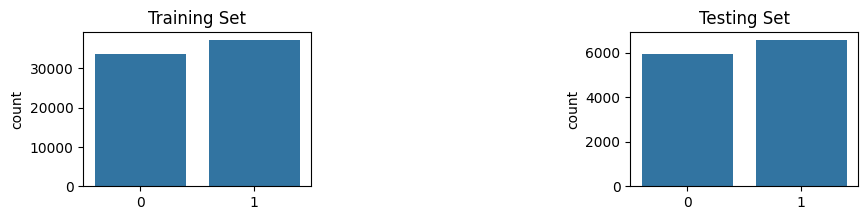

In [27]:
# Bar charts
plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.countplot(x = y_train)

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.countplot(x = y_test)
plt.show()

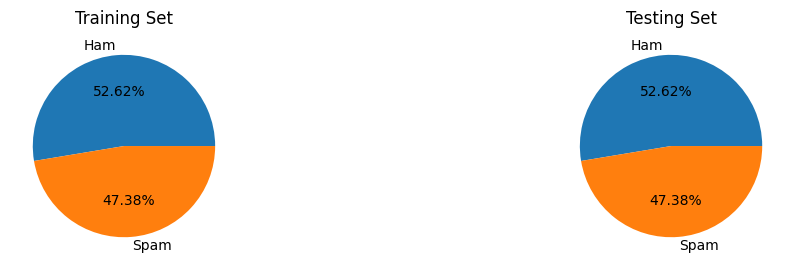

In [28]:
# Pie charts
plt.figure(figsize = (10, 3))

plt.subplot(1, 3, 1)
plt.title("Training Set")
plt.pie(pd.Series(y_test).value_counts(), labels = labels.values(), autopct = "%.2f%%")

plt.subplot(1, 3, 3)
plt.title("Testing Set")
plt.pie(pd.Series(y_test).value_counts(), labels = labels.values(), autopct = "%.2f%%")
plt.show()

## Setting up model

### Defining model and hyperparameters

In [29]:
# log_reg = linear_model.LogisticRegression(max_iter = 1000)
# svc = svm.LinearSVC()
nb = naive_bayes.MultinomialNB()
# desc_tree = tree.DecisionTreeClassifier()
# rf = ensemble.RandomForestClassifier()

models = [nb]
scores = []

### Model setup

## Training the model

### Help methods

In [30]:
def evaluate(model):
    cross_val_scores = model_selection.cross_val_score(base.clone(model), X_train, y_train, cv = 5)
    print(f"\nCross Validation Scores for model {model} : ")
    print(cross_val_scores, cross_val_scores.mean())
    scores.append(cross_val_scores.mean())

### Evaluate models

In [31]:
for model in models:
    evaluate(model)


Cross Validation Scores for model MultinomialNB() : 
[0.97638517 0.97560976 0.97638517 0.97405893 0.97673763] 0.9758353306076414


### Training model

In [32]:
model = models[np.argmax(scores)]
print(f"Best Model : {model}")

model.fit(X_train, y_train)

Best Model : MultinomialNB()


MultinomialNB()

### Make predictions

In [36]:
# Training set
y_train_pred = model.predict(X_train)

# Validation set
y_test_pred = model.predict(X_test)

## Visualize model results

### Calculate model results

Accuracy (Train) :  0.9822360073311716
[[33177   430]
 [  830 36493]]


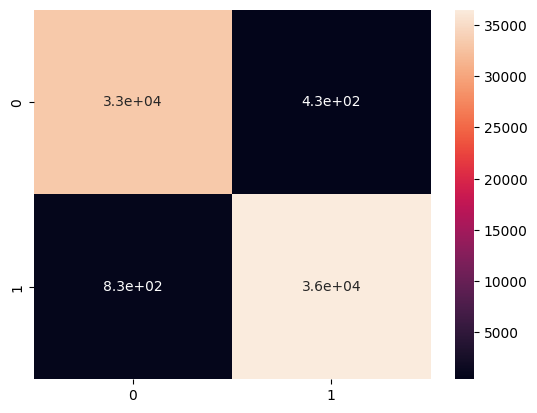

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     33607
           1       0.99      0.98      0.98     37323

    accuracy                           0.98     70930
   macro avg       0.98      0.98      0.98     70930
weighted avg       0.98      0.98      0.98     70930



In [37]:
# Training set
accuracy_train = np.sum(y_train == y_train_pred) / len(y_train)
print("Accuracy (Train) : ", accuracy_train)

# Confusion Matrix
cm_train = metrics.confusion_matrix(y_train, y_train_pred)
print(cm_train)

# Heatmap
sns.heatmap(cm_train, annot = True)
plt.show()

# Classification Report
clf_report = metrics.classification_report(y_train, y_train_pred)
print(clf_report)

Accuracy (Test) :  0.9754753155456143
[[5821  110]
 [ 197 6390]]


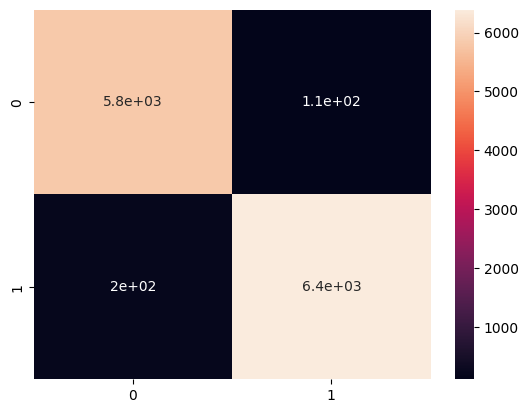

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5931
           1       0.98      0.97      0.98      6587

    accuracy                           0.98     12518
   macro avg       0.98      0.98      0.98     12518
weighted avg       0.98      0.98      0.98     12518



In [39]:
# Validation set
accuracy_test = np.sum(y_test == y_test_pred) / len(y_test)
print("Accuracy (Test) : ", accuracy_test)

# Confusion Matrix
cm_test = metrics.confusion_matrix(y_test, y_test_pred)
print(cm_test)

# Heatmap
sns.heatmap(cm_test, annot = True)
plt.show()

# Classification Report
clf_report = metrics.classification_report(y_test, y_test_pred)
print(clf_report)

### Graph model results

### Store model results

In [44]:
dump(model, "models/classification/naive_bayes_model_000.h5")

['models/classification/naive_bayes_model_000.h5']

### Loading saved model

#### Loading the model

In [45]:
saved_model = load("models/classification/naive_bayes_model_000.h5")

#### Make predictions

In [47]:
inp = np.array(["loading the model and making predictions",
       "you won a lottery !", "Nothing is permanant",
        "hello, want a job ?"])

vectorized_inp = vectorizer.transform(inp)
print(vectorized_inp.shape)
saved_model.predict(vectorized_inp)

(4, 310813)


array([0, 1, 1, 1], dtype=int64)